Osnabrück University - Machine Learning (Summer Term 2024) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Lukas Niehaus

# Exercise Sheet 08

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, June 9, 2024**. If you need help (and Google and other resources were not enough), ask in the forum, contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Conditional Probability) [0 Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** Explain the idea of conditional probability. How is it defined?

YOUR ANSWER HERE

**b)** What is Bayes' theorem? What are its applications?

YOUR ANSWER HERE

**c)** What does the law of total probability state? 

YOUR ANSWER HERE

## Assignment 1: The Logic Perceptron: XOR (3 points)

NOTE from practice: E[X] = \< x > --> just different notation \
$\mu_x$ = Population mean \
$\bar{x}$ = sample mean \
we assume: $E[X] = \bar{x}$ \

$Var(X) = E[ (X - E[X])^2] = < (x - < x >)^2 >$\
if $E[X] = 0 \rightarrow Var(X) = E[X^2] = < x^2 >$

**a)** Explain in your own words, why the XOR, in contrast to AND, OR, and NAND, can not be implemented by a single perceptron. What other logical operators face the same problem?

- XOR is not linearly seperable --> you can not simply draw a line through the space which perfectly divides it (as determined by the operator)
- can be solved by transforming the input (non-linearly) before giving it to the perceptron or adding another variable as an input 
- implication & negated implication is linearly seperable --> not an issue for a single perceptron
- equivalence & non-equivalence face the same problem as XOR (equivalence is the same as XNOR; non-equivalence is the same as XOR)

![image](ex_1a.jpg)

**b)** Create two multi-layer perceptrons that encode the XOR function, applying the solutions sketched on (ML-7 slide 37): the first should distort the input space, while the second should add another axis. Explain the operation of your MLP on a geometric level. What is the minimal number of units to be placed in the hidden layer?

![image](ex_1b1.jpg)
![image](ex_1b2.jpg)

## Assignment 2: Perceptron (6 points)

In this exercise you will implement a simple perceptron as described in the lecture [ML-07 Slide 31]. As with  previous exercises it is possible to not use our premade code blocks but write the single Perceptron completely from scratch (an empty cell to do so can be found [below](#Own-Implementation)). 

Use the following output function:
$$y = \begin{cases}1 \quad \text{if} \ s \ge 0\\0 \quad \text{else}\end{cases}$$

The `TODO`'s in the following code segments guide you through what has to be done.

*Hint*: If you have problems with `np.arrays` (which usually have shapes like `(13,)`, thus with one degenerate dimension, either set the shapes manually (`my_np_array.shape = (13, 1)`) or use [np.atleast_2d](https://numpy.org/doc/stable/reference/generated/numpy.atleast_2d.html). Other useful functions might be
* [lambda functions](https://docs.python.org/3/reference/expressions.html#lambda)
* [np.hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html?)
* [np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html?highlight=append#numpy.append)
* [np.apply_along_axis](https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html)
* [try except](https://docs.python.org/3/tutorial/errors.html?highlight=try%20except#handling-exceptions)


In [22]:
import numpy as np
import numpy.random as rnd

# TODO: Write the input activation (called net_input) and the output function (called out_fun).
def net_input(data, weights):
    s = 0
    
    for d, w in zip(data, weights):
        # sum over all datapoints * their weights 
        s = s + w*d # maybe wrong?
    return s

def out_fun(input):
    # output fun from above
    # like threshold
    if input >= 0:
        return 1
    else:
        return 0

# TODO: Write a function generate_weights that generates N (= number of dimensions) + 1 (w_0) random weights.
def generate_weights(n):
    # generating n+1 random weights
    weights = np.random.rand(n+1)
    return weights

In [21]:
####################################################
## Testing the perceptron with a concrete example ##
####################################################

# Dimensions for our test.
dims = 12

# Input is a row vector. (Shape is (1, 13).)
D = np.hstack((1, rnd.rand(dims) - 0.5))

# Weights are stored in a vector.
W = generate_weights(dims)

out = out_fun(net_input(D, W))

assert out == 1 or out == 0, "The output has to be either 1 or 0, but was {}".format(out)

weights=array([0.29584981, 0.75982771, 0.03151632, 0.91173254, 0.65048764,
       0.1545693 , 0.31635543, 0.98062856, 0.37997175, 0.53008397,
       0.56128537, 0.61019832, 0.38795602]), data=array([ 1.00000000e+00,  3.11320253e-01,  1.70158653e-01, -2.95991950e-01,
       -2.70037761e-01, -4.21438961e-04, -5.58627329e-02, -1.25829452e-01,
        1.74098805e-02, -1.64953168e-01,  4.21288350e-01,  2.76244930e-01,
       -3.71008098e-01])
s=0.2958498149691776, d=1.0, w=0.2958498149691776
s=0.5323995706516123, d=0.31132025307082245, w=0.759827712296706
s=0.537762346050768, d=0.17015865324231927, w=0.0315163248942667
s=0.26789685247216816, d=-0.29599195002545886, w=0.9117325439269148
s=0.09224062722429871, d=-0.2700377614141204, w=0.6504876367216259
s=0.09217548570116262, d=-0.0004214389612582359, w=0.15456929502105865
s=0.07450300669906212, d=-0.055862732893703915, w=0.3163554320861428
s=-0.04888894770574899, d=-0.12582945150261504, w=0.9806285645475196
s=-0.042273684868400246, d=0.01740

The following `eval_network(t, D, W)` function is used to measure the performance of your perceptron for the upcoming task.

In [23]:
def eval_network(t, D, W):
    """
    This function takes the trained weights of a perceptron
    and the input data (D) as well as the correct target values (t)
    and computes the overall error rate of the perceptron.
    """
    error = 0.0
    size = max(D.shape)
    for i in range(size):
        out = out_fun(net_input(D[i], W))
        error = error + abs(t[i] - out)
    # Normalize the error.
    try:
        return error.item(0) / size
    except AttributeError:
        return error / size

Now we will use the above defined functions to train the perceptron to one of the following logical functions: OR, NAND or NOR. 

In [24]:
# Plotting functions
import matplotlib.pyplot as plt

def function_to_learn(selector, function):
    """
    Functional definitions for the perceptron to learn
    Instantiates plots for visualization of the decision boundary
    :param selector: selects which function to activate
    :return function:
    """
    plot_points = [[0,0],[0,1],[1,0],[1,1]]
    plot_colors = []

    for point in plot_points:
        plot_colors.append(function(point[0], point[1]))
    for color, point in enumerate(plot_points):
        plt.scatter(*point, s=50, c='b' if plot_colors[color] == 1 else 'r')
    print("Perceptron will now learn '{}'...\n\n".format(selector))

NOTE: idk if this is working... sometimes it says error = 0 but it's definitely really really far off... so error shouldn't be 0...

Perceptron will now learn 'xor'...




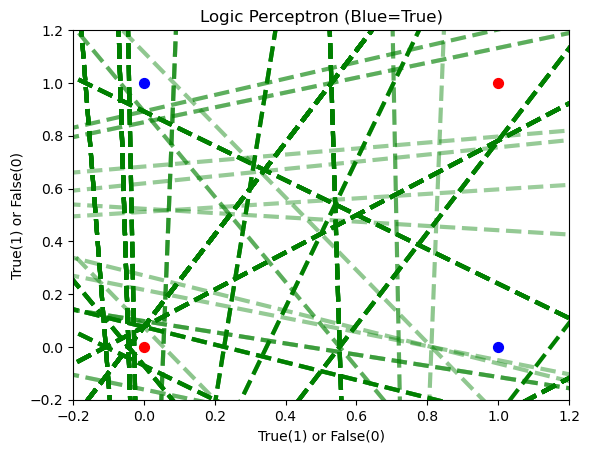

Overall error of the Perceptron: 49.60%


In [164]:
import matplotlib.pyplot as plt

# Change this line to choose other operators:
op = 'and' 
#op = 'or'
#op = 'nand'
#op = 'nor'
op = 'xor'


###################################################
## Now we train our perceptron! [ML-07 Slide 33] ##
###################################################

# TODO: Write the update function (name it 'delta_fun')
#       for the weights dependent on epsilon, the target,
#       the output and the input vector.

def delta_fun(ϵ, target, output, input):
    #delta = []
    #print(f"{target[0]=}")
    delta = ϵ * (target - output) * input
    #print("delta")

    #print(delta)
    return delta # unsure if this works

# TODO: Define suitable parameters for your problem.
# Use the following names:
#   ϵ: learning rate
#   dims: dimensions
#   training_size: the number of training samples

ϵ = 0.01
dims = 2
training_size = 1000

# TODO: Generate the weights (in a variable called W).
W = generate_weights(dims)

# TODO: Generate a matrix D of truthvalue pairs.
# The shape should be (training_size, dims).
D = np.random.randint(2, size=(training_size, dims))
#print(D)

# TODO: Pad the input D with ones for the bias. The bias should always be
# w_0, i. e. the first column of the data should be ones.
D = np.pad(D, (1,0), constant_values=(1))[1:, :] # remove [1,1,1] row crated by np.pad
#print(D)

# Learn one of the logical functions OR, NAND, NOR
# (the lambda keyword is just a short way to define functions).
log_operators = {
    'and': lambda x1, x2: x1 and x2,
    'or': lambda x1, x2: x1 or x2,
    'nand': lambda x1, x2: not (x1 and x2),
    'nor': lambda x1, x2: not (x1 or x2),
    'xor': lambda x1, x2: (x1 and not x2) or (not x1 and x2)
}

log_operator = log_operators[op]
function_to_learn(op, log_operator)

row_operator = lambda row: log_operator(row[0], row[1])
labels = np.apply_along_axis(row_operator, 1, D[:, 1:])

epochs = 200    # Extra question: What effects do changes in the epochs 
samp_size = 5  #                 and sample sizes have on our training?

for i in range(epochs):
    # Sample random from the training data.
    for idx in rnd.choice(range(training_size), samp_size, replace=False):
        y = out_fun(net_input(D[idx], W))
       # print(f"{y=}")
        #print(idx)
        W += delta_fun(ϵ, labels[idx], y, D[idx])
    # Plotting code    
    y_point = (0, (-W[0] / W[2]))
    x_point = ((-W[0] / W[1]), 0)
    try:
        slope = (y_point[1] - x_point[1]) / (y_point[0] - x_point[0]) # will not work if x and y intercepts are 0
    except ZeroDivisionError:
        print("X and Y intercepts are both zero.  Due to the way slope is calculated, this causes a division by zero.  Sorry.")
    y_out = lambda points: slope * points
    x = np.linspace(-10, 10, 100)
    plt.plot(x, y_out(x) + y_point[1], 'g--', linewidth=3, alpha=i/epochs +.2 if i/epochs +.2 < 1 else 1)
    
plt.ylim([-.2, 1.2])
plt.xlim([-.2, 1.2])
plt.title("Logic Perceptron (Blue=True)")
plt.xlabel("True(1) or False(0)")
plt.ylabel("True(1) or False(0)")
plt.show()

# Print the overall performance of the Perceptron.
print("Overall error of the Perceptron: {:.2%}".format(eval_network(labels, D, W)))

## Extra question: 
### What effects do changes in the epochs and sample sizes have on our training?
- the higher the sample size: the less steps are needed for convergence (seen in the graph bc less lines are drawn (we need less epochs)) --> bc per step the model sees more examples --> more info per step
- if there are too few epochs: the model fails at the task (training stops before performance is maximal) --> especially if combination of epochs & sample size is very small (stronger effect)

### Own Implementation

Skip this if you already implemented the perceptron above.

In [ ]:
# Space for complete own implementation

# YOUR CODE HERE

## Assignment 3: Sigmoid Activation & Backpropagation Delta Functions (5 points)

In this exercise we are first going to take the derivative of a famous activation function - the sigmoid function:

$$\sigma(t)=\frac{1}{1+e^{-t}}$$

This function is commonly used because of its nice analytical properties: Its image is the interval $(0,1)$, it is non-linear, strictly monotonous, continuous, differentiable and the derivative can be expressed in terms of the original function at the given point. This allows us to avoid redundant calculations. The sigmoid function is a special case of the more general *Logistic function* which can be found in many different fields: Biology, chemistry, economics, demography and recently most prominently: artificial neural networks.

**(a)** Computing the derivative of the sigmoid activation function:

Proof that

$$
\frac{\partial \sigma}{\partial t} = \frac{1}{\left({1 + e^{-t}}\right)} \cdot \frac{e^{-t}}{\left({1 + e^{-t}}\right)}
$$

and that it can be rewritten as an expression in terms of $\sigma(t)$ resulting in:

$$
\frac{\partial \sigma}{\partial t} = \sigma(t) \left(1 - \sigma(t) \right)
$$

![image](ex_3a.jpg)

**(b)** Multilayer perceptrons (MLPs) can be regarded as a simple concatenation (and parallelization) of several perceptrons, each having a specified activation function $\sigma$ and a set of weights $\mathbf{w}_{ij}$. The idea that this can be done was discovered early after the invention of the perceptron, but people didn't really use it in practice because nobody really knew how to figure out the appropriate $\mathbf{w}_{ij}$. The solution to this problem was the discovery of the backpropagation algorithm which consists of two steps: first propagating the input forward through the layers of the MLP and storing the intermediate results and then propagating the error backwards and adjusting the weights of the units accordingly.

An updating rule for the output layer can be derived straightforward. The rules for the intermediate layers can be derived very similarly and only require a slight shift in perspective - the mathematics for that are however not in the standard toolkit so we are going to omit the calculations and refer you to the lecture slides.

We take the (halvedleast) least-squares approach to derive the updating rule, i.e. we want to minimize the Loss function
$$L = \frac{1}{2}(y-t)^2$$
where t is the given (true) label from the dataset and y is the (single) output produced by the MLP. To find the weights that minimize this expression we want to take the derivative of $L$ w.r.t. $\mathbf{w}_{i}$ where we are now going to assume that the $\mathbf{w}_{i}$ are the ones directly before the output layer:
$$y = \sigma\left(\sum_{k=1}^n \mathbf{w}_{k}o_k\right)$$
Calculate $\frac{\partial L}{\partial \mathbf{w}_{i}}$.

*Hint*: Start here if you don't know what to do: $\frac{\partial L}{\partial \mathbf{w}_{i}} = \frac{\partial L}{\partial y}\frac{\partial y}{\partial \mathbf{w}_{i}}$

*Hint*: Remember that the derivative of the sigmoid activation function in its general form (from part **a**) is defined as: $\frac{\partial \sigma}{\partial t} = \sigma(t) \left(1 - \sigma(t) \right)$ 

![image](ex_3b1.jpg)
![image](ex_3b2.jpg)

## Assignment 4: Training a MLP by hand (6 points)

Consider the following multilayer perceptron (notation from ML-7 slides 46ff), consisting of an input layer (layer $k=0$, with two neurons 1 & 2), a hidden layer ($k=1$ with two neurons 3 & 4) and an output layer ($k=2$ with two neurons 5 & 6).  The connection weights are given by the following image and connectivity matrix:

![mlp-large.png](mlp-large.png)

to\from|1  |2  |3  |4  |5  |66
-------|---|---|---|---|---|--
1      |-  |-  |-  |-  |-  |-
2      |-  |-  |-  |-  |-  |-
3      |-3 |2  |-  |-  |-  |-
4      |2  |1  |-  |-  |-  |-
5      |-  |-  |4  |-1 |-  |-
6      |-  |-  |-2 |0.5|-  |-

The hidden layer (neurons 3 & 4) applies the [rectifier](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) as activation function.
$$
    \varphi(x)=\max(0,x)
$$

The output layer (neurons 5 & 6) uses the sigmoid ([standard logistic function](https://en.wikipedia.org/wiki/Logistic_function), [Fermi function](https://en.wikipedia.org/wiki/Fermi%E2%80%93Dirac_statistics)) as activation function.
$$
    \varphi(x)={\frac {1}{1+e^{-x}}}
$$

To measure the error, following the lecture (ML-7 slide 48), the (halved) [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) is used, that is
$$E[\{w\}](\vec{t},\vec{y}, ) = 
\tfrac{1}{2}\left\|\vec{t}-\vec{y}\right\|_2^2 =
\frac{1}{2}\sum_{i=1}^{d}(t_i-y_i)^2$$
with $\vec{y}$ being the values predicted by the network, $\vec{t}$ the target value ("ground truth"), and $d=2$ the dimensionality of the output space.

**(a)** Assume the input $\vec{x} = (1.0, 2.0)$ is given to the network (notice that in contrast to the lecture slides, we only consider a single input vector here, instead of a full dataset). Compute the weighted input $s_i(k)$ as well as the output values $o_i(k)$ for all neurons in the network.

![image](ex4a.jpg)

**(b)** Compute the loss value for the predicted output, assuming that the target value is $\vec{t}=(1.0, 0.0)$.

![image](ex4b.jpg)

**(c)** Now perform backpropagation: compute the errror signals $\delta_i(k)$ and the partial derivatives $\partial E/\partial w_{ik}$ for the weights in layer $k=2$ and $k=1$ (for layer $k=1$ remember to use the ReLU function, which has a quite simple derivative).

![image](ex4c.jpg)

**(d)** Finish your training with an update step: apply the adaptation rule with a learning rate $\varepsilon=1$ to obtain the updated network.

![image](ex4d.jpg)